# Sales Prediction Using Machine Learning

In [79]:
#Importing the required libraries:
  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [80]:
#Reading data:

data = pd.read_csv('Sales_Data.csv')
print(data.shape)                  #printing the number of rows and columns respectively
data.head(5)                       #printing the top 5 rows

(200, 4)


,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [81]:
#Understanding the data more:

data.describe()    #for statistical description of data

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [82]:
#To check the need of data cleaning:

data.info()      #gathering information about the non null count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [83]:
data.isnull().sum()     #checking if there is any null value

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

Here, we can clearly see that the dataset does not have any null or missing values.

<AxesSubplot:>

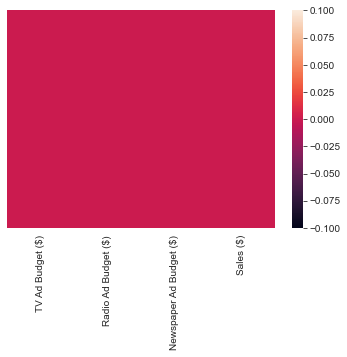

In [84]:
sns.heatmap(data.isnull(), yticklabels = False)

In [85]:
#Checking if there is any duplicate value:

data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

The dataset doesn't have any duplicate values.

In [86]:
#Renaming column names for convenience:

data.columns = ['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget', 'Sales']
data.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [87]:
#Outlier detection:
#TV
TV_mean = data.TV_Ad_Budget.mean()
print(TV_mean)

TV_std_dev = data.TV_Ad_Budget.std()
print(TV_std_dev)

print(TV_mean+3*TV_std_dev)
print(TV_mean-3*TV_std_dev)

data [(data.TV_Ad_Budget > TV_mean+3*TV_std_dev) | (data.TV_Ad_Budget < TV_mean-3*TV_std_dev)]




147.0425
85.8542363149081
404.60520894472427
-110.52020894472432


,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales


No outlier in the data of TV Ad Budget.

In [88]:
#Radio
Radio_mean = data.Radio_Ad_Budget.mean()
print(Radio_mean)

Radio_std_dev = data.Radio_Ad_Budget.std()
print(Radio_std_dev)

print(Radio_mean+3*Radio_std_dev)
print(Radio_mean-3*Radio_std_dev)

data [(data.Radio_Ad_Budget > Radio_mean+3*Radio_std_dev) | (data.Radio_Ad_Budget < Radio_mean-3*Radio_std_dev) ]




23.264000000000024
14.846809176168723
67.8044275285062
-21.276427528506147


,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales


No outlier in the data of Radio Ad Budget.

In [124]:
#Newspaper
Newspaper_mean = data.Newspaper_Ad_Budget.mean()
print(Newspaper_mean)

Newspaper_std_dev = data.Newspaper_Ad_Budget.std()
print(Newspaper_std_dev)

print(Newspaper_mean+3*Newspaper_std_dev)
print(Newspaper_mean-3*Newspaper_std_dev)

data [(data.Newspaper_Ad_Budget > Newspaper_mean+3*Newspaper_std_dev) | (data.Newspaper_Ad_Budget < Newspaper_mean-3*Newspaper_std_dev)]




30.553999999999995
21.778620838522833
95.8898625155685
-34.7818625155685


,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,zscore,zscore_Sales
16,67.8,36.6,114.0,12.5,-0.291809,-0.291809
101,296.4,36.3,100.9,23.8,1.873997,1.873997


Clearly, there are two outlier values in Newspaper Ad Budget data which need to be removed.

In [125]:
#Alternative way to identify outliers:
#Sales
data['zscore_Sales'] = (data.Sales - data.Sales.mean())/data.Sales.std()
data[(data.zscore_Sales< -3) | (data.zscore_Sales> 3)]


,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,zscore,zscore_Sales


No outlier in the data of Sales.

In [126]:
#Removing the outlier values of Newspaper_Ad_Budget:

data_no_outlier = data [(data.Newspaper_Ad_Budget < Newspaper_mean+3*Newspaper_std_dev) & (data.Newspaper_Ad_Budget > Newspaper_mean-3*Newspaper_std_dev)]
data_no_outlier


,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales,zscore,zscore_Sales
0,230.1,37.8,69.2,22.1,1.548168,1.548168
1,44.5,39.3,45.1,10.4,-0.694304,-0.694304
2,17.2,45.9,69.3,9.3,-0.905135,-0.905135
3,151.5,41.3,58.5,18.5,0.858177,0.858177
4,180.8,10.8,58.4,12.9,-0.215143,-0.215143
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,-1.230964,-1.230964
196,94.2,4.9,8.1,9.7,-0.828469,-0.828469
197,177.0,9.3,6.4,12.8,-0.234310,-0.234310
198,283.6,42.0,66.2,25.5,2.199827,2.199827


#### Visualising the data

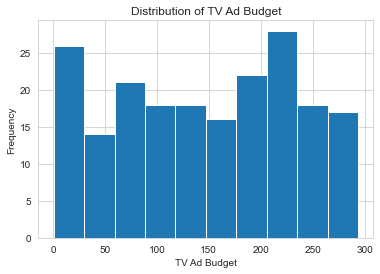

In [92]:
#Distribution of TV Ad Budget:

data_no_outlier['TV_Ad_Budget'].plot.hist()
plt.title('Distribution of TV Ad Budget')
plt.xlabel('TV Ad Budget')
plt.ylabel('Frequency')
plt.show()

Clearly, the TV Ad Budget is upto $300.

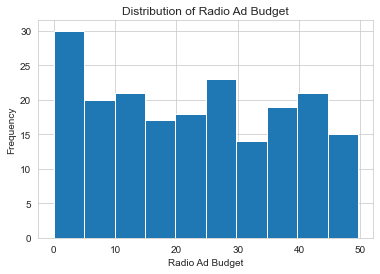

In [93]:
#Distribution of Radio Ad Budget:

data_no_outlier['Radio_Ad_Budget'].plot.hist()
plt.title('Distribution of Radio Ad Budget')
plt.xlabel('Radio Ad Budget')
plt.ylabel('Frequency')
plt.show()

The Radio Ad Budget contributes very less (as compared to that of TV)- upto $50 to the overall budget.

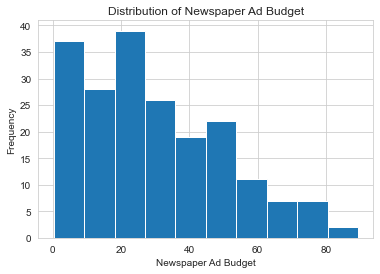

In [94]:
#Distribution of Newspaper Ad Budget:

data_no_outlier['Newspaper_Ad_Budget'].plot.hist()
plt.title('Distribution of Newspaper Ad Budget')
plt.xlabel('Newspaper Ad Budget')
plt.ylabel('Frequency')
plt.show()

The Newspaper Ad Budget also contributes less (upto around $90) to the overall budget.

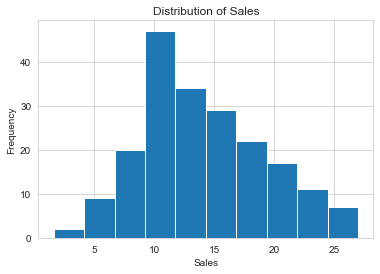

In [95]:
#Distribution of Sales:

data_no_outlier['Sales'].plot.hist()
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

The Sales is upto around $30.

<AxesSubplot:>

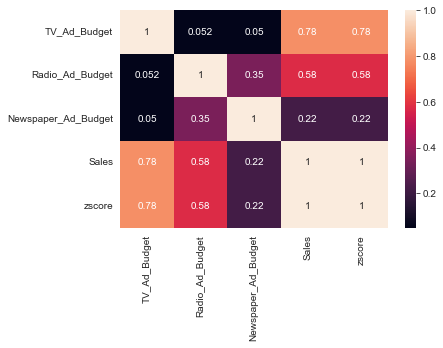

In [96]:
#Correlation Plot:

sns.heatmap(data_no_outlier.corr(), annot=True)

This plot clearly indicates that TV Ad Budget highly correlates with the Sales. The Radio Ad Budget is also an important feature but the Newspaper Ad Budget correlates very less with the Sales.

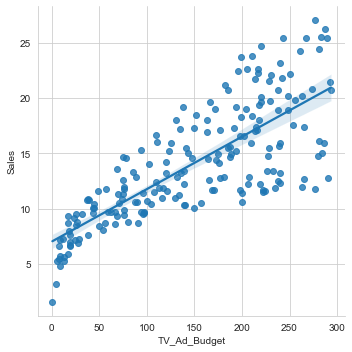

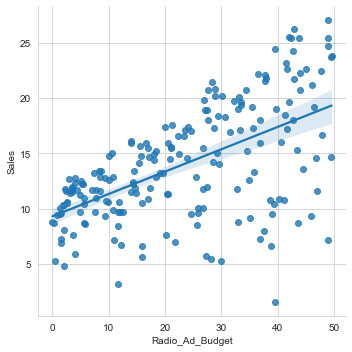

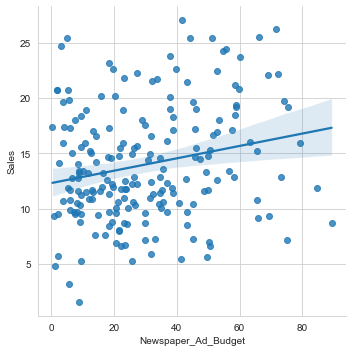

In [97]:
#Plotting regression plots each for TV, Radio and Newspaper Ad Budgets:

sns.set_style('whitegrid')
sns.lmplot(x ='TV_Ad_Budget', y ='Sales', data = data_no_outlier)

sns.set_style('whitegrid')
sns.lmplot(x ='Radio_Ad_Budget', y ='Sales', data = data_no_outlier)

sns.set_style('whitegrid')
sns.lmplot(x ='Newspaper_Ad_Budget', y ='Sales', data = data_no_outlier)

The regression plots clearly show that TV Ad Budget and Radio Ad Budget are influential factors for Sales, but the Newspaper Ad Budget is not very important for Sales.

#### Multiple Linear Regression Model

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [99]:
#defining x and y values:

x = data_no_outlier[['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget']].values
y = data_no_outlier['Sales'].values

In [100]:
#Splitting the data into training and testing datasets (75% training data and 25% testing data):

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [101]:
#Training the model to predict the future sales:

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)                    #Prediction of y value corresponding to Sales

In [102]:
print(reg)

LinearRegression()


In [103]:
print('The regression coefficient is:', reg.coef_)

The regression coefficient is: [ 0.04764663  0.1869678  -0.0029567 ]


These are the regression coefficient values for TV, Radio and Newspaper Ad Budgets respectively.

In [104]:
print('r2_score is:', np.sqrt(r2_score(y_test, y_pred)))
print('Mean Squared Error is:', mean_squared_error(y_test, y_pred))

r2_score is: 0.9495213632446692
Mean Squared Error is: 2.420963861796851


r2 score is around 95% but the mean squared error is around 2.4. The r2 score measures the proportion of variation in the dependent variable (Sales) which can be attributed to the independent variable (TV, Radio and Newspaper Ad Budgets). The Mean Squared Error measures how close a regression line is to the given data points.

In [105]:
#Predicting the future sales:

Predicted_Sales = reg.predict([[230.1, 37.8, 69.2]])
print(Predicted_Sales)

[20.56095013]


If TV Ad Budget is 230.1 dollars, Radio Ad Budget is 37.8 dollars and the Newspaper Ad Budget is 69.2 dollars, the model predicts that the sales would be approximately 20.6 dollars.

# Insights


TV Ad Budget and Radio Ad Budgets are important factors for predicting the sales, while Newspaper Ad Budget is not that much important for sales prediction.
The sales can be predicted with the given model.